![example](../images/movies.jpg)

# Movies Profitability Analysis Based on Genres' Criteria. 

**By Yevgeniy Kostrov**
***

# Overview
The purpose of this project is to analyze a large data set of movies that includes many different types of information about each movie, such as genres, release dates, budgets, box office earnings generated domestically and worldwide. The analysis will focus on following characteristics: release month, the highest number of movies released by genres, average profit by genres combined into groups, average profit by individual genres, and a number of movies released in each genre in a year over year comparison.

* I will measure the success of a movie based on budget and revenue.

* I will explore how the release month affects the success: in what months the most profitable movies are released.

* I will look at most popular genres by count.

* I will analyze a list of grouped genres vs average profit as well as individual genres vs average profit

* At the end, I will provide my recommendations and plan for further analysis.

# Business Problem

As the demand for new, original high quality content grows, driving the competition among the industry players up, the need for comprehensive targeted analytics about what makes a movie successful has been increasing. With the ever growing interest for new movies and a wide range of movie genres, precise analytics about the performance of movies can give useful information to studios, so the most strategic decisions regarding production and financing of the projects can be made. 

# Data Description
This project will use the data from the IMDB database. Specifically, the table that contains release dates, movie titles, and gross revenue domestic and worldwide.  I will, also, employ the table with primary titles, original titles, start year, run minutes, and genres.

In [1]:
# Import standard packages
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from Tools import convert_doll_to_int, convert_number_to_month

In [2]:
data_path = os.path.join(os.pardir,'data', 'zippedData')
files = os.listdir(data_path)

In [3]:
data = {}
for file in files:
    import_path = os.path.join(data_path, file)
    data[file] = pd.read_csv(import_path)

In [4]:
title_basics = data['imdb.title.basics.csv.gz'].copy()
movie_budgets = data['tn.movie_budgets.csv.gz'].copy()

# Budgets:

## I start by looking at the information about the columns in the Budgets table

In [98]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
movie_budgets.shape

(5782, 6)

## I will convert columns with budget, domestic profit, and worldwide profit  from string type variable into integer type.

In [6]:
for item in ['production_budget', 'worldwide_gross','domestic_gross']:
    movie_budgets[item] = movie_budgets[item].map(convert_doll_to_int)
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## I also look at the statistics summary of the Budgets table.

In [7]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## I don't see anything out of the ordinary in the statistical description of the table
***

## I want to check for duplicates in titles and drop the duplicates if the table has any

In [8]:
movie_budgets[movie_budgets.duplicated(subset=['movie'])].shape

(84, 6)

## Since we have 84 duplicates in the movie titles, we are going to drop them

In [9]:
movie_budgets = movie_budgets.drop_duplicates(subset=['movie'])

## Create two columns with domestic_profit and worldwide profit for our analysis of success

In [10]:
movie_budgets['domestic_profit'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']
movie_budgets['worldwide_profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

## Drop the movies that are not profitable both domestically and worldwide

In [11]:
movie_budgets.drop(movie_budgets[(movie_budgets.domestic_profit < 0)].index, inplace = True)
movie_budgets.drop(movie_budgets[(movie_budgets.worldwide_profit < 0)].index, inplace = True)
movie_budgets.shape

(2625, 8)

## I take a look at the 5 most profitable movies

In [12]:
movie_budgets = movie_budgets.sort_values(by=['worldwide_profit'], ascending=False)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864


## Drop movies released before 2000. I want to focus on recent years as most relevant to our discoveries. I create column with release year and release month.

In [13]:
movie_budgets.release_date = pd.to_datetime(movie_budgets.release_date)
movie_budgets['release_month'] = pd.DatetimeIndex(movie_budgets.release_date).month
movie_budgets['release_year'] = pd.DatetimeIndex(movie_budgets.release_date).year
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,12,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,459363944,2008208395,12,1997
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,12,2015
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,6,2015


## I would like to explore what is the last year and month for the movies in data base

In [108]:
movie_budgets[ (movie_budgets.release_year > 2018) & (movie_budgets.release_month>4)].head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
80,81,2019-05-24,Aladdin,182000000,246734314,619234314,64734314,437234314,5,2019
1380,81,2019-05-17,John Wick: Chapter 3 â Parabellum,40000000,141744320,256498033,101744320,216498033,5,2019
1370,71,2019-05-31,Rocketman,41000000,57342725,108642725,16342725,67642725,5,2019
4265,66,2019-05-31,MA,5000000,36049540,44300625,31049540,39300625,5,2019
3871,72,2019-05-03,The Intruder,8000000,35095904,36005871,27095904,28005871,5,2019


In [14]:
movie_budgets.drop(movie_budgets[movie_budgets.release_year < 2000].index, inplace=True)

## I will zoom in on the release month for the movies that bring profit both domestically and wordlwide

In [16]:
top_movies = movie_budgets.copy()
top_movies.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,12,2009
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,12,2015
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,6,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794,4,2015


## First part of our data analysis is on the release month. I will plot the histogram of the release months for the profitable movies.

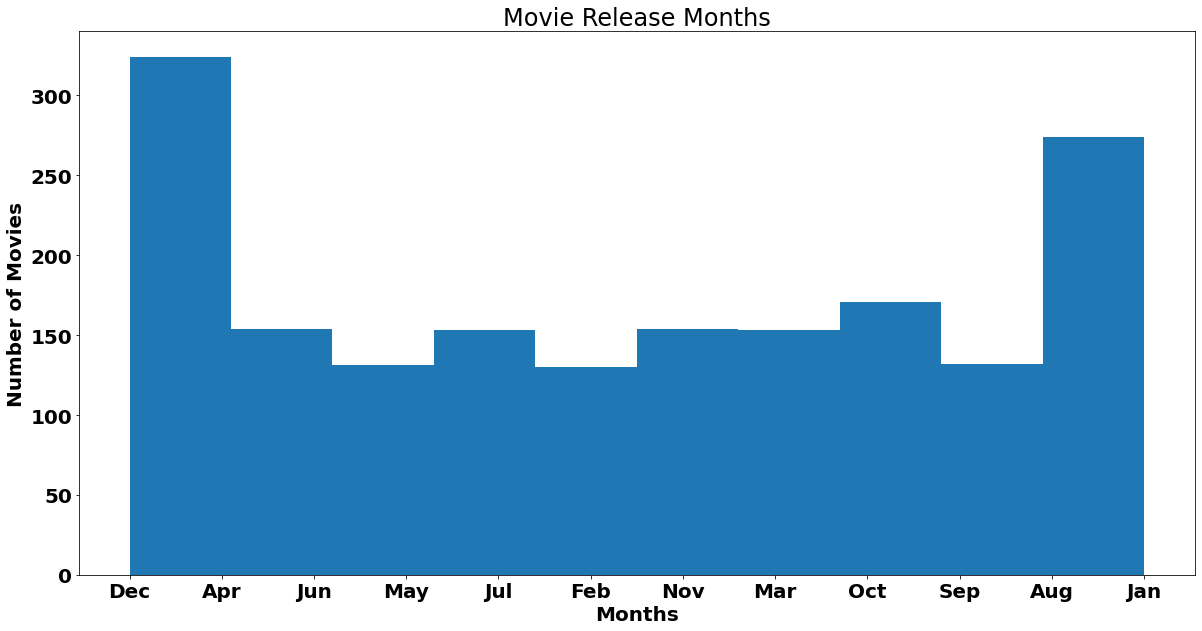

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Movie Release Months")
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
ax.set_xlabel("Months", **font)
ax.set_ylabel("Number of Movies", **font)
ax.hist(top_movies.release_month.apply(convert_number_to_month))
plt.savefig("../images/ReleaseMonthHist.png")

# Genres

## Now I want to get to the main focus of our study
*** 
## I take a look at the basic_titles table

In [18]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


## I see that there are only 4,000  genres missing. I will drop these 4,000 rows when I deal with genres visualization.  

In [19]:
title_basics[title_basics.duplicated(subset=['primary_title'])].shape

(10073, 6)

## Since there 10073 duplicates we are going to drop it

In [20]:
title_basics.drop_duplicates(subset=['primary_title'],inplace=True)
title_basics.shape

(136071, 6)

## Let's look at the statistical overview of the Title Basics table

In [76]:
title_basics.describe()

,start_year,runtime_minutes
count,136071.000000,106598.000000
mean,2014.561413,86.186289
std,2.732568,172.111139
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,86.000000
75%,2017.000000,99.000000
max,2027.000000,51420.000000


## I notice that the the maximum year for start_year column in 2027. I am going to drop the movies above 2020.

In [78]:
title_basics.drop(title_basics[(title_basics.start_year > 2020)].index, inplace = True)
title_basics.describe()

,start_year,runtime_minutes
count,135967.000000,106591.000000
mean,2014.556179,86.185044
std,2.726940,172.116688
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,86.000000
75%,2017.000000,99.000000
max,2020.000000,51420.000000


## Next, I am going to visualize top genres present in the movies that make profit both domestically and worldwide

In [93]:
new_df = title_basics.set_index('primary_title').join(top_movies.set_index('movie'),how='inner')
new_df = new_df.sort_values(by=['worldwide_profit'], ascending=False)

In [94]:
genres_dict = {}
for i in new_df.genres.dropna().str.split(","):
    for j in i:
        if j in genres_dict.keys():
            genres_dict[j] +=1
        else:
            genres_dict[j] = 1

In [95]:
sorted_dict = {}
sorted_keys = sorted(genres_dict, key=genres_dict.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = genres_dict[w]

genres_dict = sorted_dict

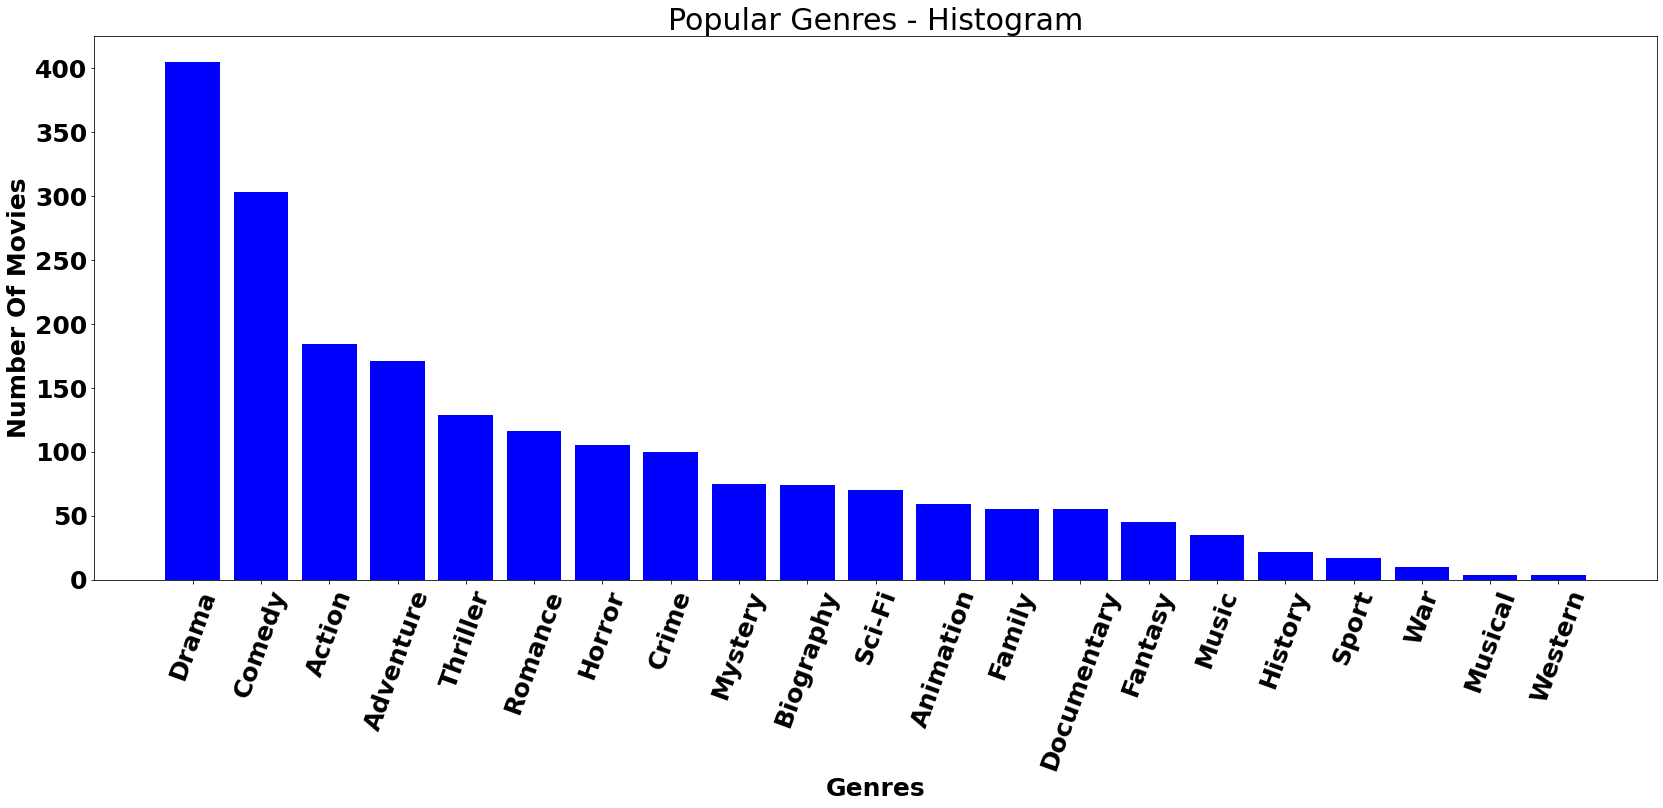

In [96]:
plt.figure(figsize=(28,10))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.xticks(rotation=70, **font)
plt.bar(list(genres_dict.keys()), genres_dict.values(), color='b')
plt.title("Popular Genres - Histogram", fontsize=30)
plt.xlabel("Genres",**font)
plt.ylabel("Number Of Movies", **font)
plt.savefig("../images/IndividualGenresHist.png",bbox_inches ="tight", 
            pad_inches = 1)
plt.show()

## One can see that out of all title the most movies are in the Drama and Comedy.

## I am also interested in the most common intersection of genres in the movies that bring profit and we use average profit for the resulting histogram

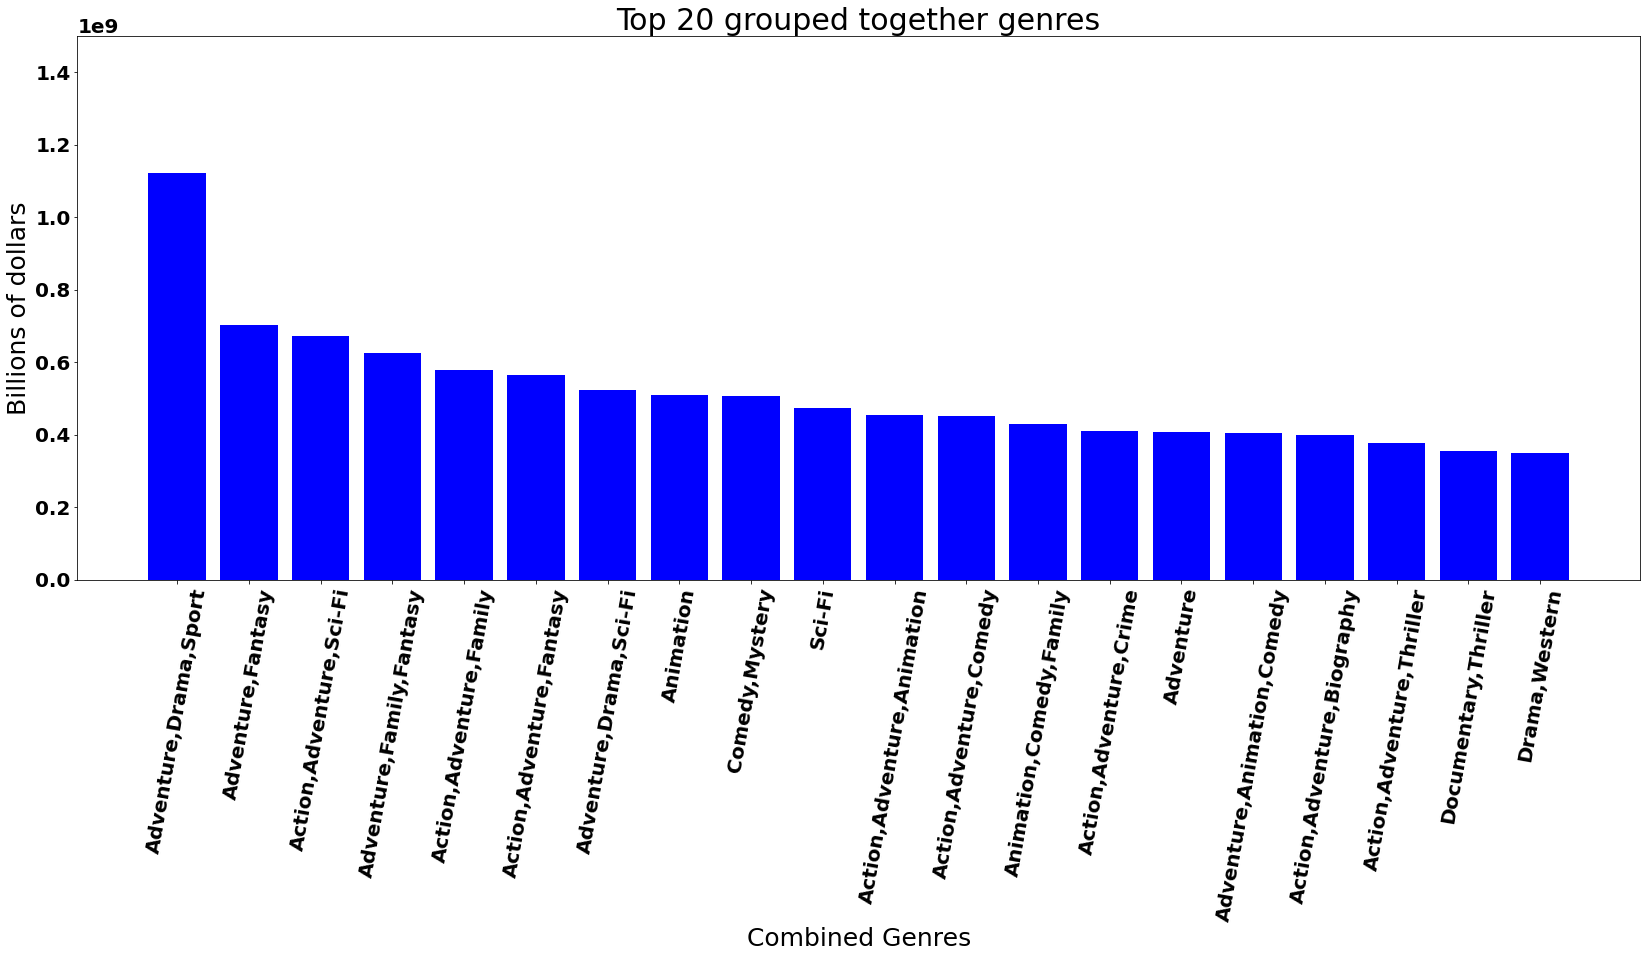

In [97]:
plot_df = new_df.groupby('genres', as_index=False)['worldwide_profit'].mean()
plot_df = plot_df.sort_values(by=['worldwide_profit'],ascending=False)
x = list(plot_df['genres'].head(20))
profit = list(plot_df['worldwide_profit'].head(20))

x_pos = [i for i, _ in enumerate(x)]
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.figure(figsize=(28,10))
plt.bar(x_pos, profit, color='blue')
plt.xlabel("Combined Genres", fontsize=25)
plt.ylabel("Billions of dollars", fontsize=25)
plt.title("Top 20 grouped together genres", fontsize= 30)
plt.xticks(x_pos, x, rotation=80)
plt.ylim(0,1500000000)
plt.savefig("../images/GroupedGenresHist.png",bbox_inches ="tight", 
            pad_inches = 1)
plt.show()

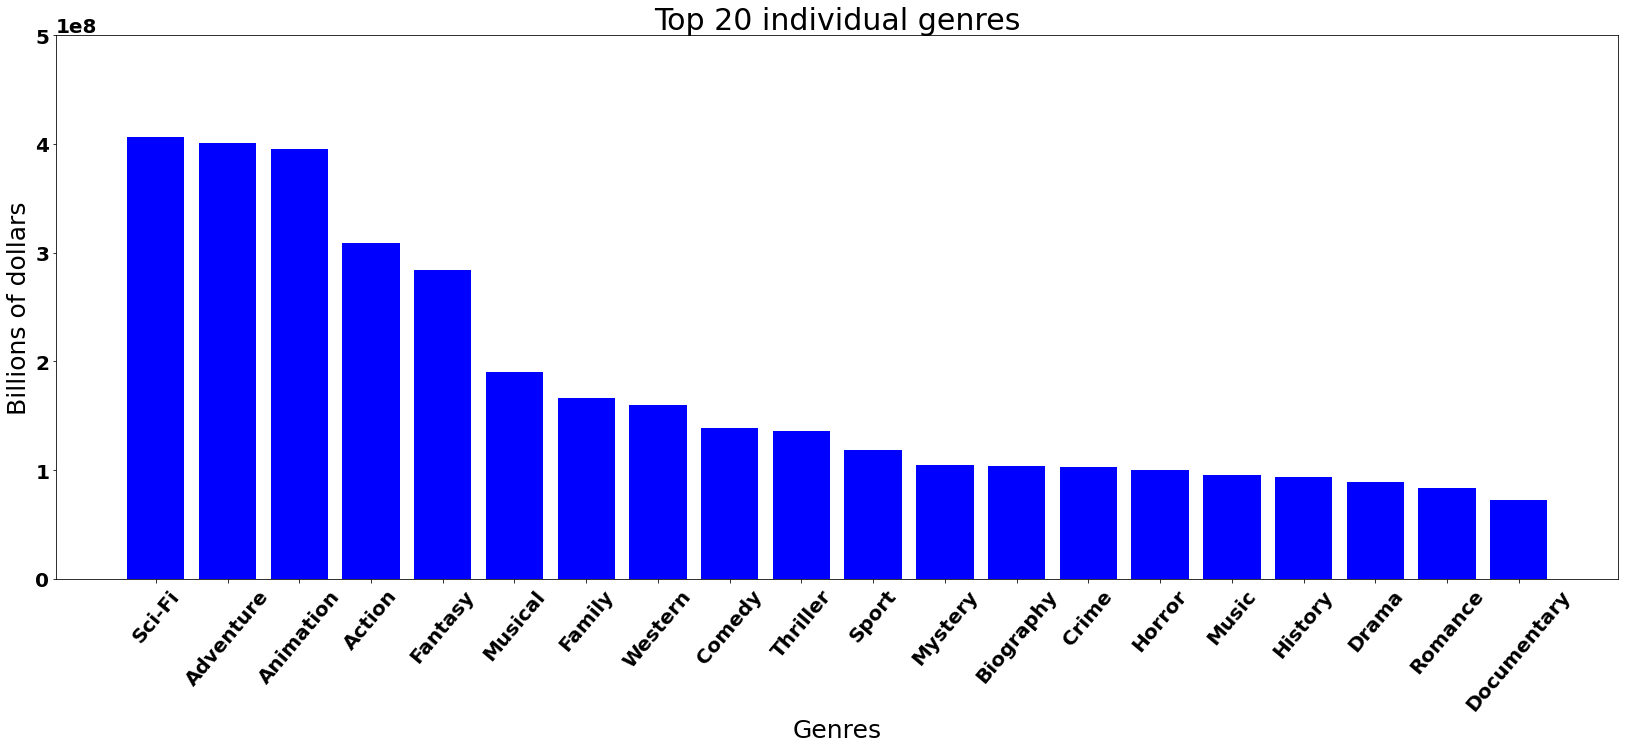

In [98]:
new_df['genres_list']= new_df.genres.str.split(",")
aver_by_genres = new_df.explode('genres_list')
plot_df = aver_by_genres.groupby('genres_list',as_index=False)['worldwide_profit'].mean()

plot_df = plot_df.sort_values(by=['worldwide_profit'],ascending=False)
x = list(plot_df['genres_list'].head(20))
profit = list(plot_df['worldwide_profit'].head(20))

x_pos = [i for i, _ in enumerate(x)]
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.figure(figsize=(28,10))
plt.bar(x_pos, profit, color='blue')
plt.xlabel("Genres",fontsize=25)
plt.title("Top 20 individual genres",fontsize=30)
plt.ylabel("Billions of dollars",fontsize=25)
plt.xticks(x_pos, x, rotation=50)
plt.ylim(0,500000000)
plt.savefig("../images/IndividualGenresByProfit.png",bbox_inches ="tight", 
            pad_inches = 1)
plt.show()


## It is also interesting to look at number of movies produced in each genre by year

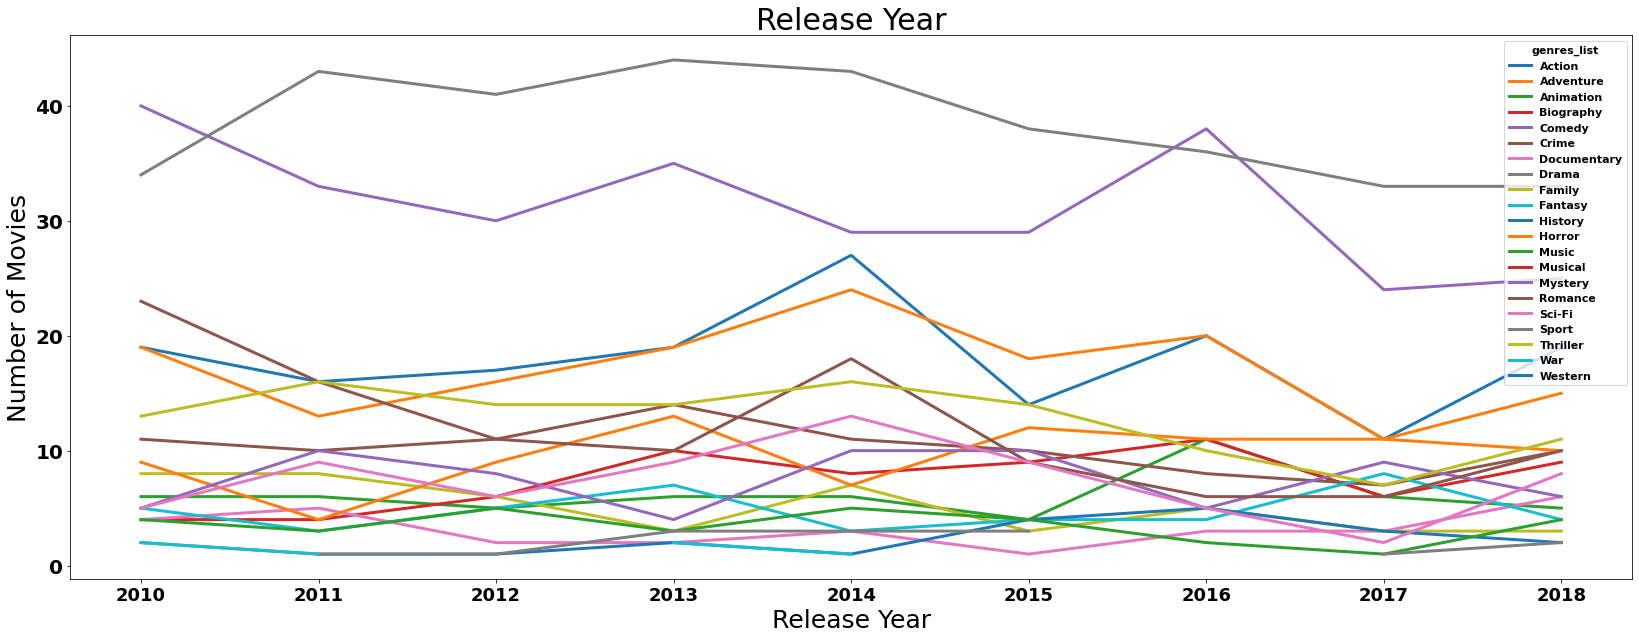

In [99]:
new_df = title_basics.set_index('primary_title').join(movie_budgets.set_index('movie'),how='inner')
new_df.drop(new_df[new_df.release_year < 2010].index, inplace=True)
new_df.drop(new_df[new_df.release_year > 2018].index, inplace=True)
new_df.reset_index()
new_df.drop_duplicates(subset=['original_title'],inplace=True)
new_df['genres_list']= new_df.genres.str.split(",")
new_df = new_df.explode('genres_list')
new_df.set_index('tconst',inplace=True)
new_df['count'] = 0
list_years = new_df.release_year.unique()
new_df = new_df.groupby(['genres_list','release_year'],as_index=False).count()
fig, ax = plt.subplots(figsize=(28,10))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 11}
plt.rc('font', **font)
new_df = new_df.pivot(index='release_year',columns='genres_list',values='count')
ax.set_xticks(np.sort(list_years))
ax.set_xticklabels(np.sort(list_years), fontsize=18) 
ax.set_title("Release Year",fontsize=30)
new_df.plot(ax=ax,linewidth=3)
ax.set_xlabel("Release Year", fontsize=25)
ax.set_ylabel("Number of Movies", fontsize=25)
ax.figure.savefig('../images/genres_by_year.png',bbox_inches ="tight", 
            pad_inches = 1)

## We can see on the graph  above that most common  movies by genres are Comedy and Drama
***
## One can suspect, based on the previous plot, that the total number of movies is decreasing.
***
## Next plot shows the total number of movies starts to decrease after 2014.

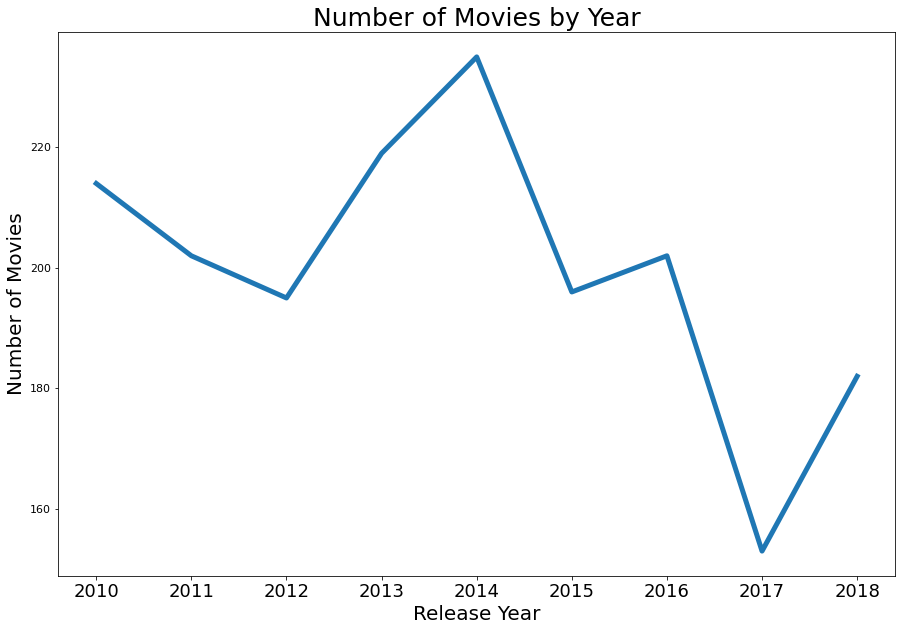

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 11}
plt.rc('font', **font)
new_df.sum(axis=1).plot(ax=ax, linewidth=5)
ax.set_title("Number of Movies by Year", fontsize = 25)
ax.set_xticks(np.sort(list_years))
ax.set_xticklabels(np.sort(list_years), fontsize=18) 
ax.set_xlabel("Release Year", fontsize=20)
ax.set_ylabel("Number of Movies", fontsize=20)
ax.figure.savefig('../images/total_number_of_movies.png')

# Conclusions:

# Data Modeling
***
I used the following analysis:
* Dropped duplicates if neccessary.
* There are 4000 NaN values in the genres columns of the Basic Titles table. I decided to keep these rows but skip them for visualization purposes.
* I converted dollar amounts from string format into integer format.
* I converted release month from integer format into string for  better readability in the histogram's labels.
* I used appropriate groupping and aggregation by average value for the analysis to produce insights into the genres.
***

# Trends:

## After investigation we can see the following trends
1. Most movies are released in December and January.
2. The most common genre among all movies is Drama, then with a big gap, Comedy. From average profit vs combination of genres histogram, we see that Drama has to be combined together with the Adventure or Sci-Fi to bring profit. From the average  profit vs individual genre histogram, we see that Sci-Fi, Adventure, and Animation bring bigest profits.
3. If we look at the Number of  Movies by Genre vs Release Year plot, we notice the most commonly produced movies are Comedies and Genres year after year. We also can notice that the total number of movies is declining. This trend is confirmed in the next plot: Total Number of Movies by Year.  


## Suggestions for a Company that wants to enter the Movie Production industry:
***
* I recommend to consider the following genres or their combination:
> 1. Drama
> 2. Adventure
> 3. Sci-fi
* I recommend to release the movie either in December or in January.
* Due to the rising popularity of the streaming platforms and decrease in total number of movies produced, I recommend to consider collaboration with one of the online streaming content provider in the production of a movie 
***

# Ways to improve the analysis
***
* It would be great to include more recent data into analysis.
* Include movies produced by streaming platforms into analysis.
* Extend the scope of the project to include:
> - analysis of budgets vs profitability
> - analysis of directors vs profit
> - analysis of actors/actresses and their salaries vs profit
***